## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
- Download the data of your choice.
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.
- Identify correlations between variables using correlation matrices and/or heatmaps.
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Solution:

## Understanding the Dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
df = pd.read_csv('../data/ds_salaries.csv')


In [19]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df.info() #information about types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.isnull().sum() #check missing values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
# The 'describe' function calculates descriptive statistics of the dataframe.
# In this case, we use it to calculate the statistics for object data type.
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [13]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [15]:
#view the shape of data

print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 3755
Number of columns 11


In [17]:
#view the features

print("Data Features:\n",df.columns.values)

Data Features:
 ['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']


In [22]:
#datatype of each feature 

print(df.dtypes)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [23]:
#number of unique values for each feature

print(df.nunique())

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


## Distribution of the job titles in the Data Science field

In [24]:
job_titles = df.job_title.value_counts().head(10)
job_titles

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

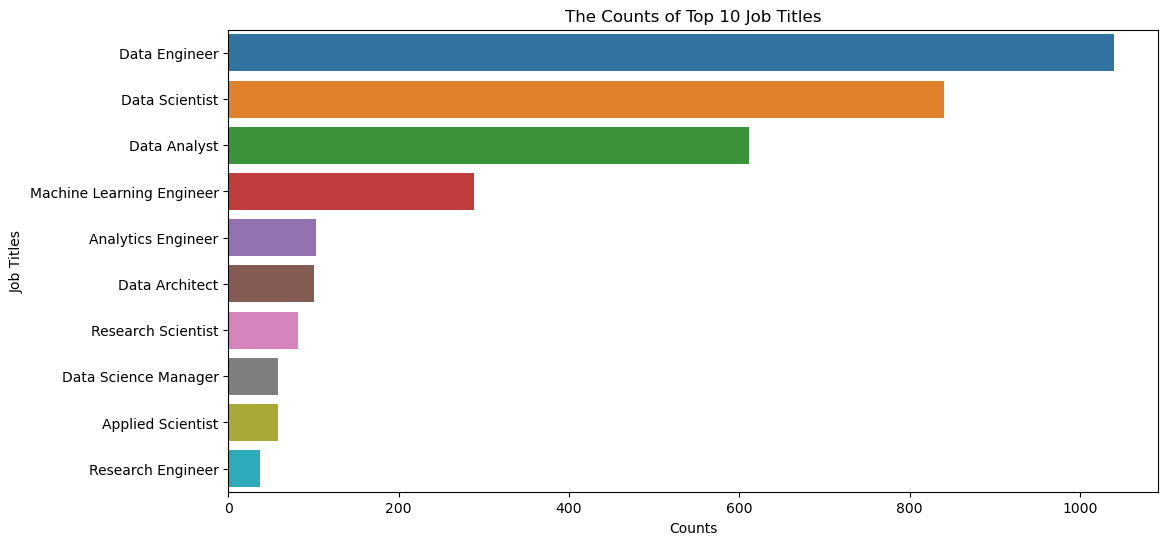

In [32]:
#plotting bar chart represent the count of each job title 

plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Counts of Top 10 Job Titles")
plt.ylabel('Job Titles')
plt.xlabel('Counts')

sns.barplot(y=job_titles.index, x= job_titles.values);

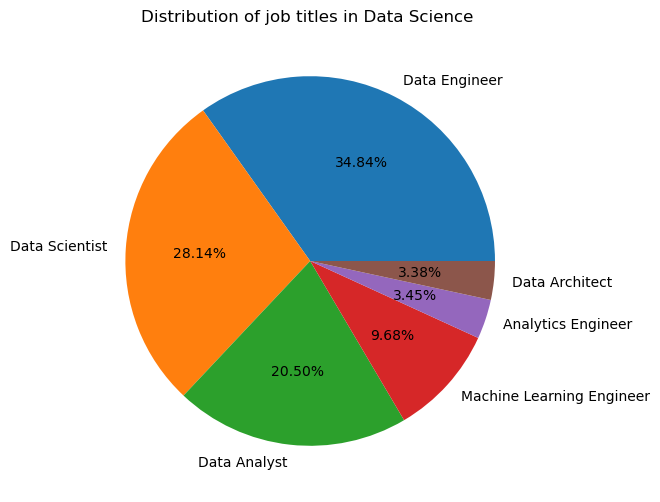

In [33]:
#using pie chart to show distributions

job_titles = df.job_title.value_counts().head(6)
plt.figure(figsize=(9,6))
plt.title("Distribution of job titles in Data Science ")
plt.pie(job_titles, labels=job_titles.index, autopct='%.2f%%');

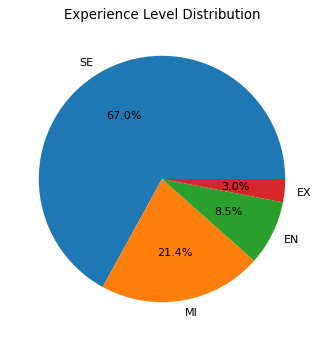

In [36]:
plt.figure(figsize=(6,5),dpi=80)
# calculate the number of individuals in each experience level
level_counts = df['experience_level'].value_counts()
# add title
plt.title('Experience Level Distribution')
# create a pie chart
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
# display plot
plt.show()

## Rank the Data Science job titles in terms of salary.

In [40]:
#data frame with only job titles and salaries in USD
salary = df[['job_title','salary_in_usd']]

#sorting the data Science job titles by salaries descending
salary = salary.groupby(df['job_title']).mean().round(0).head(20).sort_values('salary_in_usd',ascending = False).reset_index()

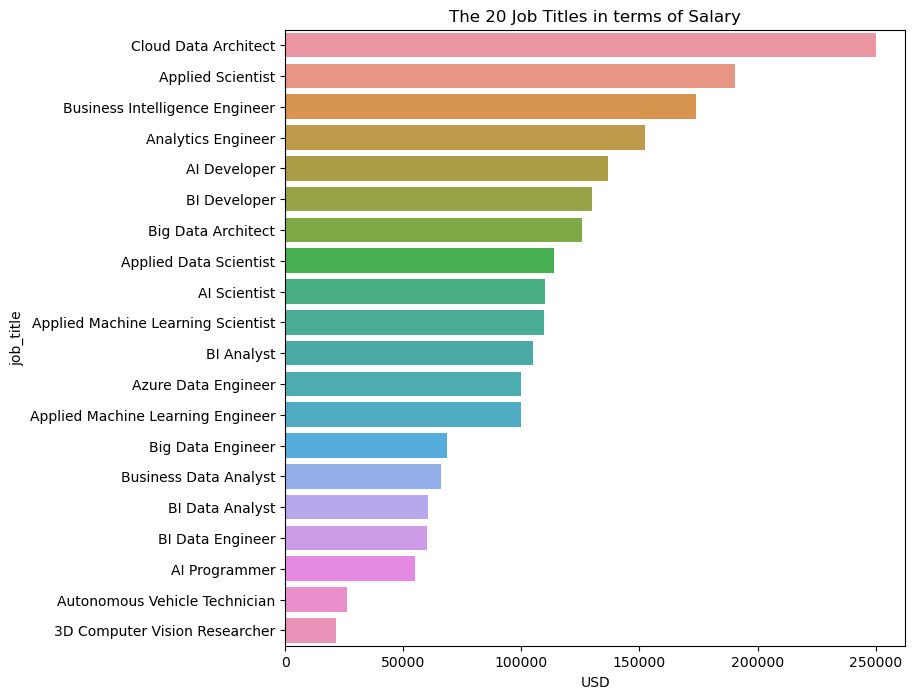

In [54]:
# set up the plot figure size
plt.figure(figsize=(8,8))

# set the x-axis tick labels rotation to 0 degrees (horizontal)
plt.xticks(rotation=0)

# add a title to the plot
plt.title("The 20 Job Titles in terms of Salary")

# set the labels for the x-axis and y-axis
plt.ylabel('Job Titles')
plt.xlabel('USD')

# create a bar plot of the data using seaborn's barplot function
sns.barplot(data=salary, x=salary.salary_in_usd.values, y=salary.job_title)

# show the plot
plt.show()

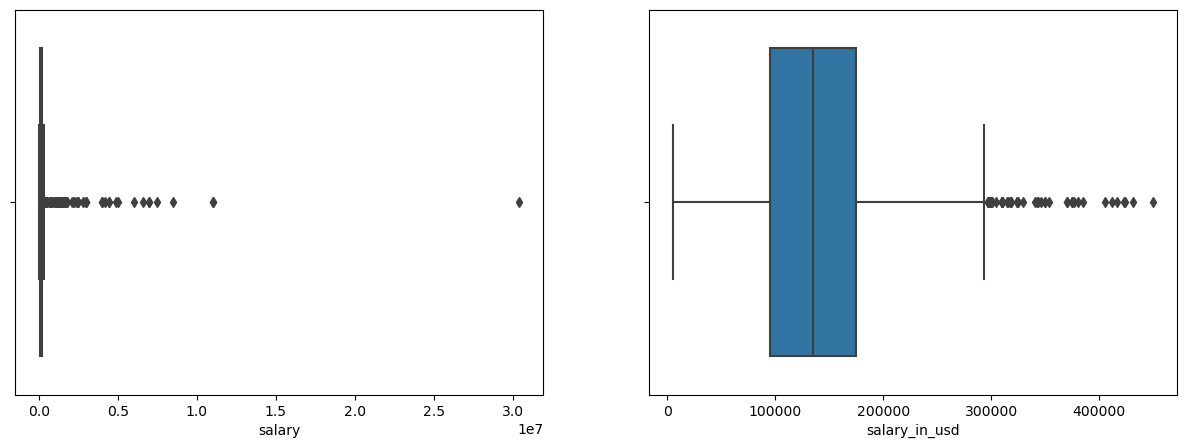

In [47]:
# Define a list of numerical features to visualize
numerical = ['salary','salary_in_usd']

# Initialize an index variable
i = 0

# While loop to iterate through each pair of features
while i < 2:

    # Create a figure with 1 row and 2 columns, each subplot is a 15x5 rectangle
    fig = plt.figure(figsize=[15,5])

    # Create a boxplot for the first feature
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i],data=df)
    i += 1

    # Create a boxplot for the second feature
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i],data=df)
    i += 1

    # Display the figure
    plt.show()

## The Top 10 Countries have Data Science employees

In [49]:
countries = df.employee_residence.value_counts().head(10)


<Axes: title={'center': 'The Top 10 Countries with Data Science employees'}, xlabel='Countries', ylabel='Counts'>

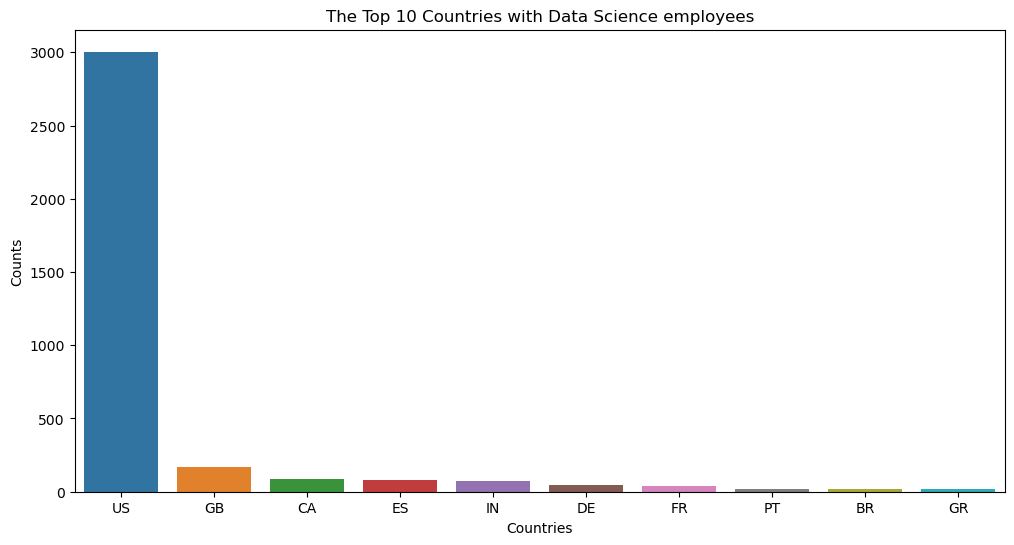

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0) # Set the rotation of the x-axis tick labels to 0 degrees (horizontal)
plt.title("The Top 10 Countries with Data Science employees")
plt.ylabel('Counts')
plt.xlabel('Countries')

sns.barplot(x=countries.index, y= countries.values)

## Data science field 

In [55]:
work_year = df.work_year.value_counts()
work_year

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

<Axes: title={'center': 'The Growth of DS Employees Over 4 Years'}, xlabel='Year', ylabel='Counts'>

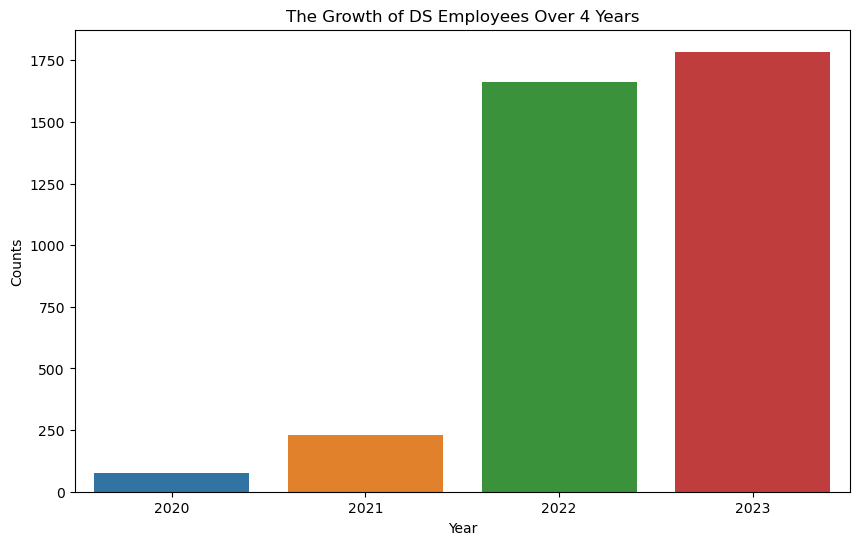

In [56]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=0)
plt.title("The Growth of DS Employees Over 4 Years")
plt.ylabel('Counts')
plt.xlabel('Year')

sns.barplot(y=work_year.values, x= work_year.index)

## Experience level

In [61]:
df.head(10)['experience_level']

0    SE
1    MI
2    MI
3    SE
4    SE
5    SE
6    SE
7    SE
8    SE
9    SE
Name: experience_level, dtype: object

EN, which is Entry-level.

MI, which is Mid-level.

SE, which is Senior-level.

EX, which is Executive-level.

In [62]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})

<Axes: title={'center': 'Experience level and Salary'}, xlabel='experience_level', ylabel='salary_in_usd'>

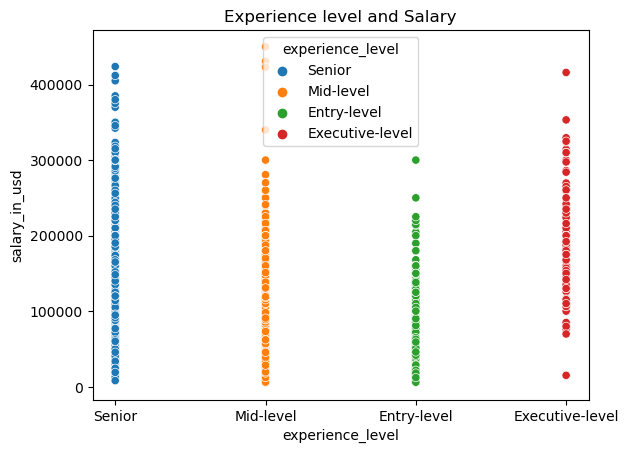

In [83]:
plt.title("Experience level and Salary")     #Add title

sns.scatterplot(x=df['experience_level'],y=df['salary_in_usd'],hue=df['experience_level'])

In [84]:
df['experience_level'].value_counts()


Senior             2516
Mid-level           805
Entry-level         320
Executive-level     114
Name: experience_level, dtype: int64